# Machine Learning

Importing Libraries

In [1]:
import os
import pickle
import numpy as np
import pandas as pd

# Helper Functions to keep notebook clean
import functions as func

Define file and folder paths

In [2]:
data_final = 'DATA/pickle/data_final.pkl'
data_descriptors = 'DATA/pickle/descriptors.pkl'

PATH = os.getcwd() + "/"

Load the two lists from the previous steps

In [3]:
with open(data_final, 'rb') as f:
    list_data = pickle.load(f)

with open(data_descriptors, 'rb') as g:
    descriptors = pickle.load(g)

## Classic Models

Import sklearn models, this needs to be adjusted when changing which models to load.

In [10]:
import sklearn.dummy
import sklearn.neural_network
import sklearn.semi_supervised
import sklearn.ensemble
import sklearn.svm
import sklearn.neighbors
import sklearn.tree

import xgboost

from collections import OrderedDict

In [11]:
classic_model_names = OrderedDict({
    'dumc': sklearn.dummy.DummyClassifier,
    'mlpc': sklearn.neural_network.MLPClassifier,
    'stc': sklearn.semi_supervised.SelfTrainingClassifier,
    'abc': sklearn.ensemble.AdaBoostClassifier,
    'gbc': sklearn.ensemble.GradientBoostingClassifier,
    'rfc': sklearn.ensemble.RandomForestClassifier,
    'etc': sklearn.ensemble.ExtraTreesClassifier,
    'svc': sklearn.svm.SVC,
    'lsvc': sklearn.svm.LinearSVC,
    'knc': sklearn.neighbors.KNeighborsClassifier,
    'dtc': sklearn.tree.DecisionTreeClassifier,
    'xgbc': xgboost.XGBClassifier
})

In [13]:
def check_multiple_descriptors(desc, list_data, classic_model_names):
    dict_eval = {}
    for i in range(len(desc)):
        print("--- Descriptor: " + str(desc[i]) + " ---")
        dfc = func.learning_alg(list_data[i][2],list_data[i][3],list_data[i][0],list_data[i][1],classic_model_names)
        dict_eval[desc[i]] = dfc
    return dict_eval

deval = check_multiple_descriptors(descriptors, list_data, classic_model_names)

--- Descriptor: Composition_based_feature_vectors ---
mlp
stc
xgb
Finished fitting 12 models, total time: 19.89 s
--- Descriptor: Ewald_Site_Energy ---
mlp
stc


KeyboardInterrupt: 

In [ ]:
display(deval['Composition_based_feature_vectors'])

,model_name,model_name_pretty,model_params,fit_time,accuracy score train,auc train,accuracy score test,auc test,F1 train,F1 test,Precision,Recall
0,dumc,DummyClassifier,"{'constant': None, 'random_state': None, 'stra...",0.000000,0.546198,NaN,0.574274,NaN,0.000000,0.000000,0.000000,0.000000
1,stc,SelfTrainingClassifier,"{'base_estimator__C': 1.0, 'base_estimator__br...",2.413922,0.627964,NaN,0.634025,NaN,0.561657,0.559441,0.573770,0.545809
2,lsvc,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.069013,0.773508,NaN,0.733610,NaN,0.742804,0.679321,0.696721,0.662768
3,svc,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.286050,0.871218,NaN,0.805809,NaN,0.857013,0.776718,0.760748,0.793372
4,abc,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",2.476433,0.872036,NaN,0.814108,NaN,0.860455,0.791045,0.758497,0.826511
5,knc,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.001499,0.904334,NaN,0.825726,NaN,0.903545,0.824121,0.722467,0.959064
6,gbc,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",12.278646,0.962388,NaN,0.898755,NaN,0.958781,0.885122,0.856102,0.916179
7,mlpc,MLPClassifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",1.916835,0.995094,NaN,0.937759,NaN,0.994624,0.931880,0.872449,1.000000
8,dtc,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.448079,0.996729,NaN,0.945228,NaN,0.996409,0.939560,0.886010,1.000000
9,xgbc,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.588102,0.996729,NaN,0.960166,NaN,0.996409,0.955307,0.914439,1.000000


In [ ]:
#A = pd.DataFrame([])
A = []

for name in descriptors:
    df_eval = deval[name]
    df_eval = df_eval.set_index(['model_name_pretty'])
    df_eval = df_eval[['accuracy score test','F1 test','Precision','Recall']]
    df_eval = df_eval.rename(columns={'accuracy score test': name})
    A.append(df_eval)
    #A.merge(df_eval, how='outer')

B = pd.concat((A[i] for i in range(len(A))),axis=1)

In [ ]:
etc = ExtraTreesClassifier()

i = 0
X_train = split_list[i][2]
X_test = split_list[i][3]
y_train = split_list[i][0]
y_test = split_list[i][1]


etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

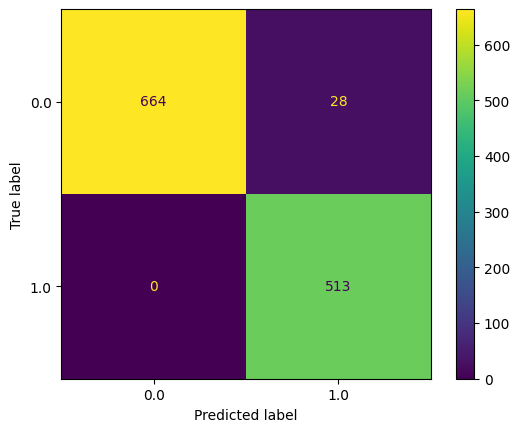

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etc.classes_)
cmd.plot()

plt.show()

In [ ]:
display(B)

,Composition_based_feature_vectors,F1 test,Precision,Recall,Ewald_Site_Energy,F1 test,Precision,Recall,Smooth_Overlap_of_Atomic_Positions,F1 test,Precision,Recall,Structural_Heterogenity,F1 test,Precision,Recall
model_name_pretty,,,,,,,,,,,,,,,,
DummyClassifier,0.574274,0.000000,0.000000,0.000000,0.538583,0.000000,0.000000,0.000000,0.568151,0.000000,0.000000,0.000000,0.569061,0.000000,0.000000,0.000000
SelfTrainingClassifier,0.634025,0.559441,0.573770,0.545809,0.538583,0.000000,0.000000,0.000000,0.568151,0.000000,0.000000,0.000000,0.569061,0.000000,0.000000,0.000000
LinearSVC,0.733610,0.679321,0.696721,0.662768,0.777953,0.743169,0.796875,0.696246,0.873144,0.862170,0.812155,0.918750,0.750000,0.711324,0.707937,0.714744
SVC,0.805809,0.776718,0.760748,0.793372,0.828346,0.780684,0.950980,0.662116,0.925776,0.912837,0.926045,0.900000,0.892265,0.871711,0.895270,0.849359
AdaBoostClassifier,0.814108,0.791045,0.758497,0.826511,0.801575,0.787162,0.779264,0.795222,0.797571,0.776119,0.742857,0.812500,0.841160,0.829630,0.771350,0.897436
KNeighborsClassifier,0.825726,0.824121,0.722467,0.959064,0.776378,0.778816,0.716332,0.853242,0.762483,0.755556,0.680000,0.850000,0.801105,0.800000,0.705882,0.923077
GradientBoostingClassifier,0.898755,0.885122,0.856102,0.916179,0.954331,0.949212,0.974820,0.924915,0.908232,0.897898,0.864162,0.934375,0.929558,0.919685,0.904025,0.935897
MLPClassifier,0.937759,0.931880,0.872449,1.000000,0.867717,0.864078,0.821538,0.911263,0.913630,0.909091,0.833333,1.000000,0.936464,0.931343,0.871508,1.000000
DecisionTreeClassifier,0.945228,0.939560,0.886010,1.000000,0.918110,0.915858,0.870769,0.965870,0.944669,0.939794,0.886427,1.000000,0.901934,0.897842,0.814621,1.000000
